In [15]:
import pandas as pd
import numpy as np
from audioset_tagging_cnn.config import labels

In [4]:
Df = pd.read_pickle('test.xz')

In [18]:
allprobas = np.stack(Df['probas'])

In [19]:
from matplotlib import pyplot as plt 

In [25]:
def keep_array_thresh(probasarray,threshold=0.1):
    array_max = np.max(probasarray,axis=0)
    ind_max = np.argwhere(array_max>threshold)

    return ind_max

In [35]:
ind_labels =keep_array_thresh(allprobas,threshold = 0.08)

In [37]:
kept_labels = [labels[int(i)] for i in ind_labels]

In [38]:
kept_labels

['Speech',
 'Animal',
 'Domestic animals, pets',
 'Dog',
 'Cat',
 'Fowl',
 'Turkey',
 'Music',
 'Ocean',
 'Vehicle',
 'Car']

In [46]:
allprobas_kept = allprobas[:,ind_labels].squeeze()

In [47]:
allprobas_kept.shape

(24, 11)

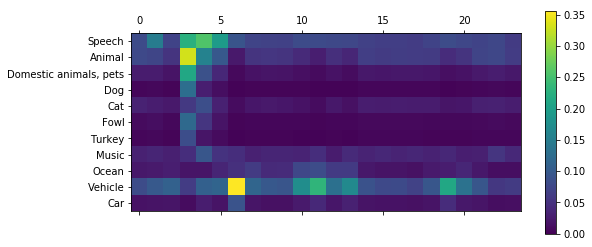

In [54]:
plt.matshow(allprobas_kept.T,vmin=0)
plt.yticks(ticks = range(len(kept_labels)),labels=kept_labels)
plt.colorbar()